# Deep Learning 2019
## Assignment 1 - Machine Learning Basics
Please complete the questions below by modifying this notebook and send this file via e-mail to

__[pir-assignments@l3s.de](mailto:pir-assignments@l3s.de?subject=[DL-2019]%20Assignment%20X%20[Name]%20[Mat.%20No.]&)__

using the subject __[DL-2019] Assignment X [Name] [Mat. No.]__. The deadline for this assignment is __April 30th, 2019, 9AM__.

Programming assignments have to be completed using Python 3. __Please do not use Python 2.__

__Always explain your answers__ (do not just write 'yes' or 'no').

Please add your name and matriculation number below:

__Name:__
<br>
__Mat. No.:__

----

### 1. Bias-Variance Tradeoff

You have a dataset of $1000$ instances that is divided into a Train-Dev-Test set $(60\%-20\%-20\%)$. The bayes error (or human performance) is $5\%$. 

1. If the training error is $1\%$ and the dev error is $10\%$, is it a bias or a variance problem?
overfitting due to high variance  
2. If the training error is $10\%$ and the dev error is $10\%$, is it a bias or a variance problem?
underfitting due to high bias    
3. If the training error is $10\%$ and the dev error is $6\%$, is it a bias or a variance problem?
optimal case where the dev set is a subset of training set
4. If the training set and dev set are differently distributed, what can you expect? 
high variance in training set and high bias in dev set

5. Is it acceptable to have different dev and test distributions? Why ?
not acceptable, model arameters are set according to the dev set, those parameters might not be suitable to the test data.
6. Is it acceptable to have different distribution of training data from dev and test (Dev and test set have the same distribution)? Why ?
not acceptable because the model will be trained on a different distribution of data and thus cannot generalize well

### 2. Dev-Test Splits
If your dataset has $10^6$ instances and the bayes error is $5\%$, 
1. are dev and test splits of $1\%$ acceptable, if the bayes error on both dev and test is $5\%$?
acceptable, error rate is as low as possible (irreducible error threshold)
2. are dev and test splits of $1\%$ acceptable, if the bayes error on both dev and test splits is $15\%$?
not acceptable, error can be minimized 

### 3. Sum of Squares Loss
Given a polynomial function of the form
\begin{equation} 
    f(x, {\bf{w}}) = \sum_{j=0}^M w_j x^j.
\end{equation}
We are given a training set comprising $N$ observations of $x$, given by $x_1, x_2, ..., x_n$, together with the corresponding observations of target values $y_1, y_2, ..., y_n$.

We would like to fit the data to the polynomial function, $f(x, {\bf{w}})$ by minimizing the following loss function:
\begin{equation} 
    E({\bf{w}}) = {1 \over 2}\sum_{n=1}^N (f(x_n, {\bf{w}}) - y_n)^2.
\end{equation}
Show that the coefficients ${\bf{w}} = \{w_i\}$ that minimize the above loss function are given by the solution to the following set of linear equations:
\begin{equation} 
    \sum_{j=0}^M A_{ij} w_j = Y_i
\end{equation}
where
\begin{equation} 
    A_{ij} = \sum_{n=1}^N (x_n)^{i+j} \text{ and } Y_i =\sum_{n=1}^N (x_n)^i y_n.
\end{equation}

Solution: 
$$\frac{d}{dw}E(w)= \frac{d}{dw} \frac{1}{2} \sum_{n=1}^N (f(x_{n},w) - y_{n})^2$$
$$=\frac{1}{2} 2 \sum_{n=1}^N \frac{d f(x_{n},w)}{dw} (f(x_{n},w) - y_{n})$$ 
$$= \sum_{n=1}^N[ (\frac{d}{dw} \sum_{i=0}^M w_i x_{n}^i)  *(\sum_{j=0}^M w_j x_{n}^j - y_{n}) ]$$
$$= \sum_{n=1}^N[ (\sum_{i=0}^M x_{n}^i)  *(\sum_{j=0}^M w_j x_{n}^j - y_{n}) ]$$
$$= \sum_{n=1}^N[ (\sum_{i=0}^M x_{n}^i) * (\sum_{j=0}^M w_j x_{n}^j) - \sum_{i=0}^M x_{n}^i y_{n} ]$$
$$= \sum_{n=1}^N[ \sum_{i=0}^M \sum_{j=0}^M x_{n}^i x_{n}^j w_j - \sum_{i=0}^M x_{n}^i y_{n} ]$$
$$= \sum_{n=1}^N[ \sum_{i=0}^M \sum_{j=0}^M x_{n}^{i+j} w_j - \sum_{i=0}^M x_{n}^i y_{n} ]$$
$$= \sum_{i=0}^M[ \sum_{j=0}^M \sum_{n=1}^N x_{n}^{i+j} w_j - \sum_{n=1}^N x_{n}^i y_{n} ]$$
In order to find the Minimum $$ \frac{d}{dw}E(w)= 0 $$
$$ \sum_{i=0}^M[ \sum_{j=0}^M \sum_{n=1}^N x_{n}^{i+j} w_j - \sum_{n=1}^N x_{n}^i y_{n} ] = 0$$
$$ \sum_{j=0}^M \sum_{n=1}^N x_{n}^{i+j} w_j - \sum_{n=1}^N x_{n}^i y_{n} = 0$$
$$ \sum_{j=0}^M \sum_{n=1}^N x_{n}^{i+j} w_j = \sum_{n=1}^N x_{n}^i y_{n} $$

### 4. Linear Regression
Implement a simple linear regression with __Numpy__ to fit a line, $h(x) = w_1 + w_2 x$,  to a set of points generated using the `generate_data` function as defined below. In particular, find $w_1$ and $w_2$ such that the sum of squares error, $\sum_i ||h(x_i) - y_i||^2$, is minimized. 

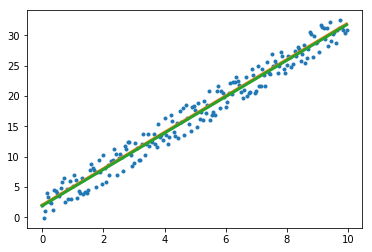

In [18]:
from matplotlib import pyplot
import numpy as np
from scipy import stats


def generate_data(f, spread, x_start, x_end, delta=1):
    """Generate a number of data points from f with some spread."""
    x = np.asarray(np.arange(x_start, x_end, delta))
    y = f(x) + (np.random.rand(*x.shape) - 0.5) * spread
    return x, y


def lin_reg(x, y):
    #slope, intercept, r_value, p_value, std_err= stats.linregress(x,y)
    #return intercept,slope
    
    xmean = np.mean(x)
    ymean = np.mean(y)    
    meanOfxSquared=(np.mean(np.array(x)*np.array(x)))
    square_xmean=xmean*xmean
    xy_mean=np.mean(x*y)
    slope=(xy_mean-(xmean*ymean))/(meanOfxSquared- square_xmean)
    interceptor = ymean - slope * xmean
    return interceptor, slope
    
# generate some points
f = lambda x: 2 + 3 * x
x, y = generate_data(f, spread=5, x_start=0, x_end=10, delta=0.05)

# plot the points
pyplot.plot(x, y, marker='.', linewidth=0)

# plot f
pyplot.plot(x, f(x), linewidth=3)

# perform linear regression
w = lin_reg(x, y)

# plot the regression line
pyplot.plot(x, w[0] + w[1] * x, linewidth=3)

pyplot.show()

### 5. Maximum Likelihood Estimation (MLE)

Suppose we have a stochastic system in which events of interest occur independently with small and constant probability, i.e., the events are independently and identically distributed (i.i.d.). Such a process is called a Poisson process. 

The time intervals or delays between individual events in a Poisson process follow an exponential distribution with parameter $\lambda$ as follows:
\begin{equation}
\Pr(x)=\begin{cases}
  \lambda e^{-\lambda x} & x \geq 0\\
  0 & x<0
\end{cases}
\end{equation}

Now, let $\{x_i\} = \{x_1, x_2, ..., x_n\}$ denote our observed time interval data. 

1. What is the log likelihood of this data under the exponential model $\Pr(x)$?

2. Derive an analytical form for $\lambda$ which maximizes the likelihood of our observed data.

3. Implement the maximum likehood estimator, i.e. compute $\lambda$ for the following observed time intervals.
$$\{x_1, x_2, . . . , x_n\} = \{0.08817335, 0.7699288 , 1.37257133, 1.07451531, 0.02959294,\\ 0.16400137, 0.12498293, 0.56801231, 0.23876629, 0.80438577\} $$

1. 
This product over many probabilities can be inconvenient for a variety of reasons.
For example, it is prone to numerical underflow. To obtain a more convenient
but equivalent optimization problem, we observe that taking the logarithm of the
likelihood does not change its arg max but does conveniently transform a product into a sum:
$$ θML = arg max \sum_{i=1}^m log Pr( x^i ; θ).$$

2. for two items $$ x_1 and x_2 : $$
$$L(\lambda|x_1))=(\lambda)e^{ -\lambda x_1 }$$
$$L(\lambda|x_2))=(\lambda)e^{ -\lambda x_2 }$$
$$L(\lambda|x_1 and x_2))=L(\lambda|x_1))L(\lambda|x_2))$$
$$L(\lambda|x_1))L(\lambda|x_2)) = (\lambda)e^{ -\lambda x_1 }. (\lambda)e^{ -\lambda x_2 }$$
$$= \lambda^2 (e^{ -\lambda x_1 }. e^{ -\lambda x_2 })$$


for n observations:
$$L(\lambda|x_1, x_2, ...,x_n))= \lambda^n (e^{ -\lambda (x_1+x_2+ .. +x_n) })$$
$$\frac{d}{d\lambda} L(\lambda|x_1, x_2, ...,x_n)) = \frac{d}{d\lambda} \lambda^n (e^{ -\lambda (x_1+x_2+ .. +x_n) }) $$
take the derivative of the log of the function
$$=\frac{d}{d\lambda} [log(\lambda^n) +log( (e^{ -\lambda (x_1+x_2+ .. +x_n) }))] $$
$$=n.\frac{1}{\lambda} -(x_1+x_2+ .. +x_n) $$
set the derivative =0 :
$$n.\frac{1}{\lambda} -(x_1+x_2+ .. +x_n) = 0$$
thus
$$\lambda =\frac{n}{(x_1+x_2+ .. +x_n)}$$


In [5]:
import numpy as np


def exponential_mle(data):
    """
    This function estimates the parameter lambda of the exponential
    distribution from the input data using maximum likelihood 
    estimation (MLE). The PDF of the distribution is defined as:

    f(x; lambda) = lambda * exp(-lambda * x) if x >= 0 else 0

    Parameters
    ---
    data: array-like input data, indicating the time intervals between
          events

    Returns
    ---
    lambda: the parameter estimated using MLE
    """
    # TODO
    mle_lambda= len(data)/np.sum(data)
    return mle_lambda


intervals = [0.08817335, 0.7699288 , 1.37257133, 1.07451531, 0.02959294,
             0.16400137, 0.12498293, 0.56801231, 0.23876629, 0.80438577]

print('{:0.4f}'.format(exponential_mle(intervals)))

1.9102
